In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/Universities.csv")

In [4]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [6]:
df.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [7]:
input_data=df.iloc[:,1:]

In [8]:
input_data

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [9]:
from sklearn.preprocessing import MinMaxScaler
norm_data=MinMaxScaler().fit_transform(input_data)

In [10]:
norm_data

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667],
       [0.81707317, 0.84722222, 0.11842105, 0.21052632, 0.4275118 ,
        0.93333333],
       [0.75609756, 0.86111111, 0.21052632, 0.31578947, 0.41699623,
        0.93333333],
       [0.6097561 , 0.63888889, 0.13157895, 0.31578947, 0.20816096,
        0.83333333],
       [0.96341463, 0.875     , 0.        , 0.26315789, 0.56169926,
        1.        ],
       [0.73170732, 0.65277778, 0.39473684, 0.05263158, 0.91099123,
        0.66666667],
       [0.91463415, 0.91666667, 0.21052632, 0.21052632, 0.47686392,
        0.8       ],
       [0.62195122, 0

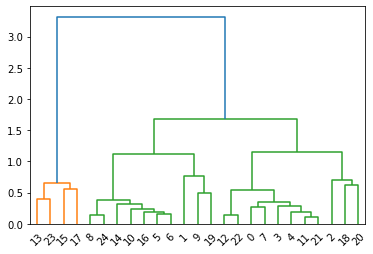

In [11]:
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='ward'))

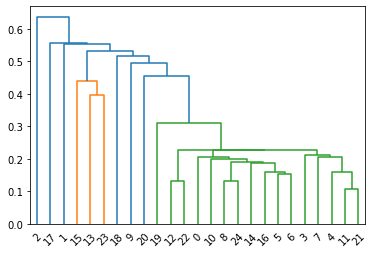

In [12]:
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='single'))

In [13]:
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

In [14]:
y_hc= hc.fit_predict(norm_data)

Clusters=pd.DataFrame(y_hc, columns=['Clusters'])

In [15]:
Clusters

,Clusters
0,0
1,0
2,2
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [17]:
Clusters.value_counts()

Clusters
0           18
1            4
2            3
dtype: int64

In [18]:
df['Clusters']= Clusters

In [19]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
